##### Import the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualizations

# Import specific functions from statsmodels for time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose  # For decomposing time series into trend, seasonal, and residual components
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # For Holt-Winters Exponential Smoothing method

# Import mean_squared_error from sklearn to evaluate the model's performance
from sklearn.metrics import mean_squared_error  # For calculating mean squared error


In [21]:
#SD = Sales Data
SD = pd.read_csv('sales_data.csv')
SD

,Date,Sales,Product Category
0,2023-01-01,222,Electronics
1,2023-01-02,97,Books
2,2023-01-03,167,Books
3,2023-01-04,242,Electronics
4,2023-01-05,373,Electronics
...,...,...,...
726,2024-12-27,261,Clothing
727,2024-12-28,394,Clothing
728,2024-12-29,120,Clothing
729,2024-12-30,198,Electronics


In [ ]:
# Convert the 'Date' column to the datetime format.

In [22]:
SD['Date'] = pd.to_datetime(SD['Date'])

In [ ]:
# Set the 'Date' column as the index with a specified frequency.

In [23]:
SD.set_index('Date', inplace=True)
SD.index.freq = 'D'

In [ ]:
##### Explore the Data 

In [24]:
SD.head()

,Sales,Product Category
Date,,
2023-01-01,222,Electronics
2023-01-02,97,Books
2023-01-03,167,Books
2023-01-04,242,Electronics
2023-01-05,373,Electronics


In [ ]:
##### Visualize

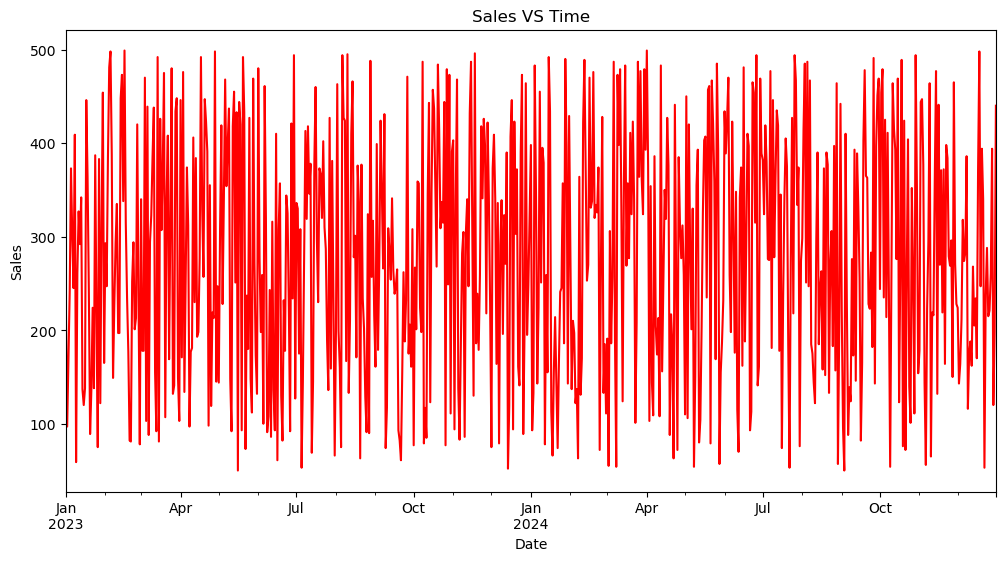

In [35]:
SD['Sales'].plot(figsize=(12, 6),c='red')
plt.title('Sales VS Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Break down the time series into its trend, seasonal, and residual components.

In [26]:
decomposition = seasonal_decompose(SD['Sales'], model='additive')

In [ ]:
# Visualize the decomposed components.

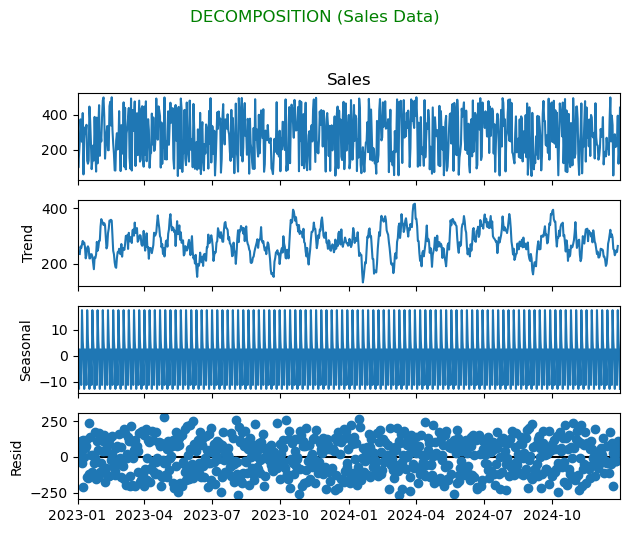

In [39]:
decomposition.plot()
plt.suptitle('DECOMPOSITION (Sales Data)' , y=1.1, c='green')
plt.show()

##### Split data --> Train & Test sets

In [28]:
train_size = int(len(SD) * 0.8)
train_data, test_data = SD.iloc[:train_size], SD.iloc[train_size:]
train_size

584

In [ ]:
##### Build and Train the Forecasting Model 

In [29]:
model = ExponentialSmoothing(train_data['Sales'], seasonal='add', seasonal_periods=12).fit()
model

In [ ]:
##### Forecast Future Demand

In [30]:
forecast = model.forecast(len(test_data))
forecast

2024-08-07    325.133868
2024-08-08    315.441562
2024-08-09    297.877421
2024-08-10    313.020486
2024-08-11    296.429998
                 ...    
2024-12-27    305.936381
2024-12-28    353.493524
2024-12-29    325.133868
2024-12-30    315.441562
2024-12-31    297.877421
Freq: D, Length: 147, dtype: float64

In [ ]:
##### Evaluate the model

In [31]:
mse = mean_squared_error(test_data['Sales'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17343.0754409217


#### Mean Squared Error: 17472.597527639635

In [ ]:
##### Visualize the forecast

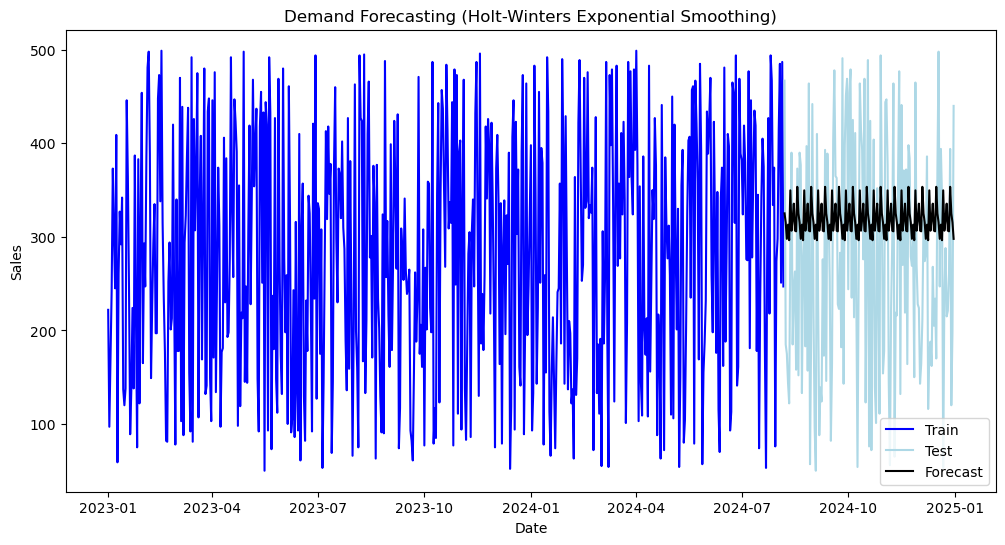

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Sales'], label='Train', c='blue')
plt.plot(test_data.index, test_data['Sales'], label='Test', c='lightblue')
plt.plot(test_data.index, forecast, label='Forecast', c='black')
plt.title('Demand Forecasting (Holt-Winters Exponential Smoothing)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()